# 26 — Pandas Integration (Plotting workflows)

## Goal
Use Pandas for fast EDA and reporting while still leveraging Matplotlib for full control.

### What you'll learn
- Pandas `.plot()` vs Matplotlib primitives
- Index-aware time series plotting
- GroupBy plots (aggregations)
- Rolling windows and resampling
- Using Pandas output to drive Matplotlib customization
- Practical patterns for clean, reproducible charts


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
np.random.seed(42)
print('✅ Setup complete')

✅ Setup complete


## 1. Create Example Business Dataset
We’ll use a synthetic dataset with dates, categories, and metrics to mimic real reporting workflows.


In [2]:
n = 600
dates = pd.date_range('2024-01-01', periods=n, freq='D')
df = pd.DataFrame({
    'date': dates,
    'segment': np.random.choice(['Consumer', 'SMB', 'Enterprise'], size=n, p=[0.55, 0.30, 0.15]),
    'region': np.random.choice(['APAC', 'EMEA', 'NA'], size=n, p=[0.35, 0.30, 0.35]),
    'revenue': np.random.lognormal(mean=10.2, sigma=0.35, size=n),
    'orders': np.random.poisson(lam=22, size=n),
})
df['revenue'] = df['revenue'].round(2)
df = df.set_index('date')
df.head()

,segment,region,revenue,orders
date,,,,
2024-01-01,Consumer,APAC,46533.76,17
2024-01-02,Enterprise,APAC,26291.14,20
2024-01-03,SMB,APAC,22151.94,19
2024-01-04,SMB,APAC,51969.12,18
2024-01-05,Consumer,APAC,16206.95,17


## 2. Fast EDA with Pandas `.plot()`
Pandas plotting is great for quick exploration, but you still can access the underlying Matplotlib axes for polishing.

```python
ax = df['revenue'].plot(kind='line')
ax.set_title('...')
```


=== PANDAS LINE PLOT + MATPLOTLIB POLISH ===


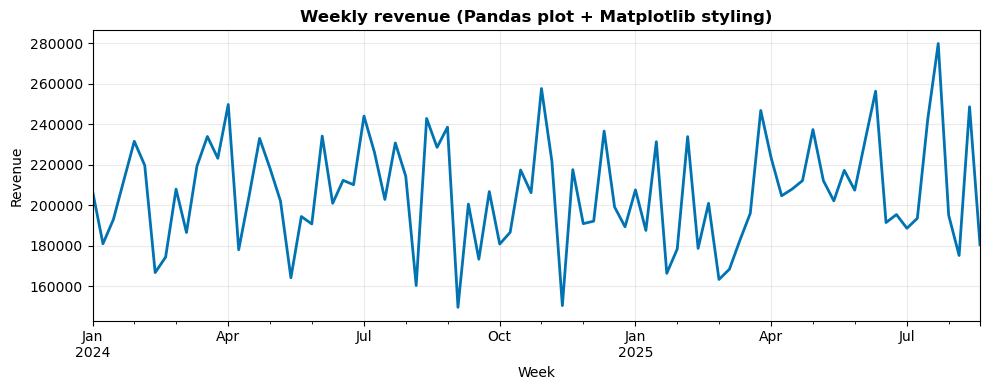

In [3]:
print('=== PANDAS LINE PLOT + MATPLOTLIB POLISH ===')
daily = df['revenue'].resample('W').sum()
ax = daily.plot(figsize=(10, 4), color='#0173B2', lw=2)
ax.set_title('Weekly revenue (Pandas plot + Matplotlib styling)', fontweight='bold')
ax.set_xlabel('Week')
ax.set_ylabel('Revenue')
ax.grid(True, alpha=0.25)
plt.tight_layout()
plt.show()

## 3. GroupBy + Plotting (Bar, Stacked)
GroupBy is the most common reporting pattern: aggregate then plot.

```python
by_seg = df.groupby('segment')['revenue'].sum().sort_values()
by_seg.plot(kind='barh')
```


=== GROUPBY BARH ===


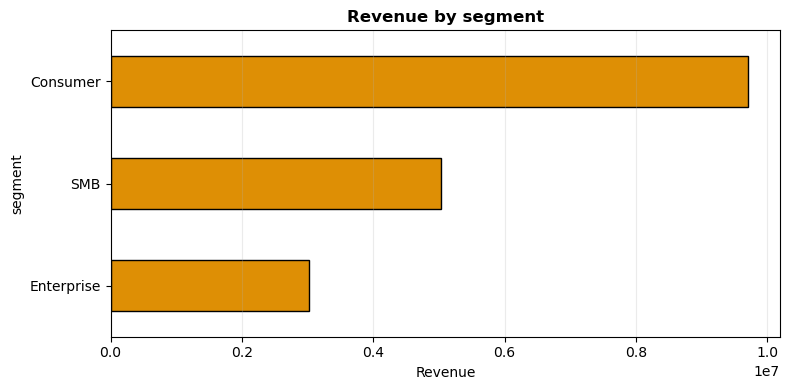

In [4]:
print('=== GROUPBY BARH ===')
by_seg = df.groupby('segment')['revenue'].sum().sort_values()
ax = by_seg.plot(kind='barh', figsize=(8, 4), color='#DE8F05', edgecolor='black')
ax.set_title('Revenue by segment', fontweight='bold')
ax.set_xlabel('Revenue')
ax.grid(True, axis='x', alpha=0.25)
plt.tight_layout()
plt.show()

## 4. Pivot Table → Matplotlib (Stacked bars)
For multi-dimensional breakdowns, pivot then plot.


=== PIVOT → STACKED BAR ===


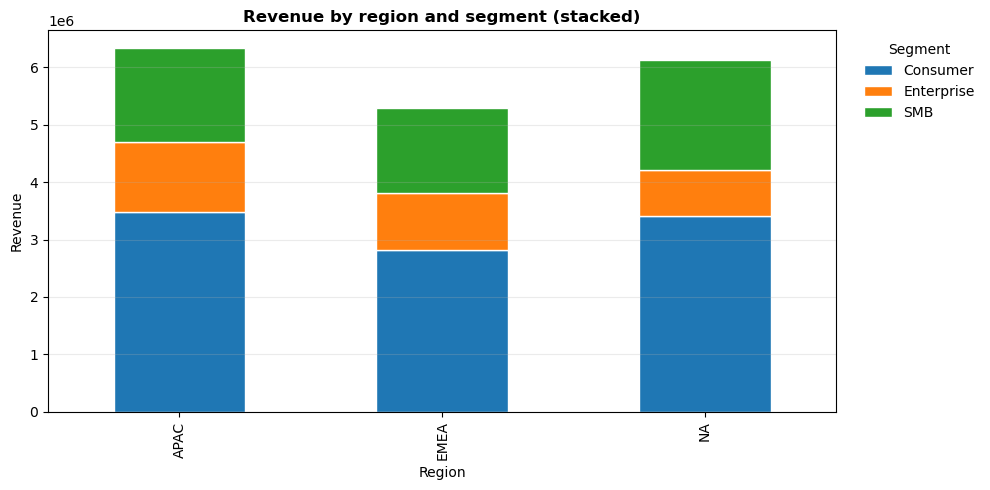

In [5]:
print('=== PIVOT → STACKED BAR ===')
pivot = df.pivot_table(values='revenue', index='region', columns='segment', aggfunc='sum')
ax = pivot.plot(kind='bar', stacked=True, figsize=(10, 5), edgecolor='white')
ax.set_title('Revenue by region and segment (stacked)', fontweight='bold')
ax.set_xlabel('Region')
ax.set_ylabel('Revenue')
ax.legend(frameon=False, title='Segment', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.grid(True, axis='y', alpha=0.25)
plt.tight_layout()
plt.show()

## 5. Rolling Windows & Multiple Series
Rolling averages reduce noise and help show trends.


=== ROLLING AVERAGE ===


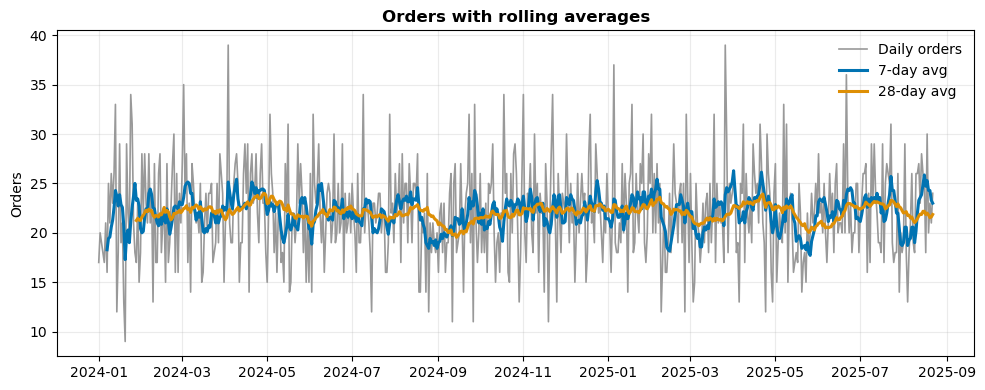

In [6]:
print('=== ROLLING AVERAGE ===')
ts = df['orders'].resample('D').sum()
roll7 = ts.rolling(7).mean()
roll28 = ts.rolling(28).mean()

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(ts.index, ts, color='0.6', lw=1.2, label='Daily orders')
ax.plot(roll7.index, roll7, color='#0173B2', lw=2.2, label='7-day avg')
ax.plot(roll28.index, roll28, color='#DE8F05', lw=2.2, label='28-day avg')
ax.set_title('Orders with rolling averages', fontweight='bold')
ax.set_ylabel('Orders')
ax.grid(True, alpha=0.25)
ax.legend(frameon=False)
plt.tight_layout()
plt.show()

## Practice + Quick Reference
### Practice
1. Create a monthly revenue trend (`resample('M')`) and annotate max month.
2. Build a small dashboard (2×2): revenue trend, orders trend, revenue by segment, revenue by region.
3. Export a clean figure for a report (PNG 300 DPI).

### Quick reference
```python
df.resample('W')['revenue'].sum().plot()
df.groupby('segment')['revenue'].sum().plot(kind='barh')
pivot = df.pivot_table(values='revenue', index='region', columns='segment', aggfunc='sum')
pivot.plot(kind='bar', stacked=True)
```
